# <b><span style="color:red">Reading text from Font images</span></b>

#### This notebook examines the text present inside the images of a particular font folder.The Pytesseract module will be utilized to extract and observe the text from these images.

In [1]:
import os
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
font_dataset_path=(os.path.join('../project_files','data','OpenSans'))

Total images in the dataset:  73


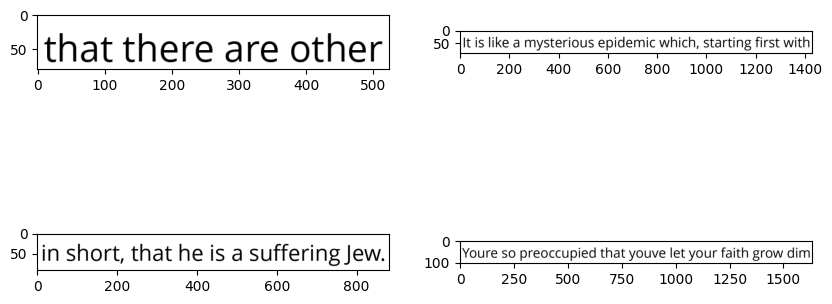

In [2]:
#displaying a few sample images from the folder
all_images = os.listdir(font_dataset_path)
total_images = len(all_images)
print("Total images in the dataset: ", total_images)
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    img = Image.open(os.path.join(font_dataset_path, all_images[i]))
    plt.imshow(img)

In [3]:
#using pytesseract to extract text from the images
for i in range(4):
    img = Image.open(os.path.join(font_dataset_path, all_images[i]))
    text = pytesseract.image_to_string(img)
    print("Text extracted from image ", i+1, " : ", text)

Text extracted from image  1  :  that there are other

Text extracted from image  2  :  It is like a mysterious epidemic which, starting first with

Text extracted from image  3  :  in short, that he is a suffering Jew.

Text extracted from image  4  :  Youre So preoccupied that youve let your faith grow dim



In [13]:
#getting the width of the images and the number of characters in the all the images
widths = []
num_chars = []
text_data=[]
for i in range(total_images):
    image_path = os.path.join(os.path.join(font_dataset_path, all_images[i]))
    image = Image.open(image_path)
    width, height = image.size
    text = pytesseract.image_to_string(image)
    text_data.append(text)
    num_char = len(text)
    widths.append(width)
    #while reading the text new line characters are also counted as characters, removing them in final count
    num_chars.append(num_char)

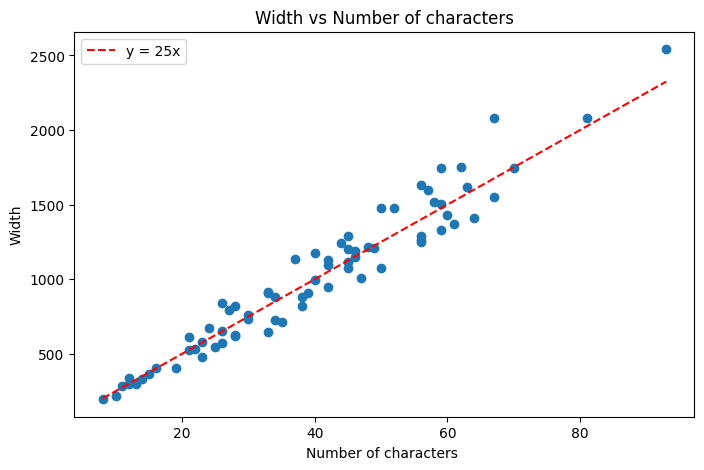

In [14]:
#plotting the width vs number of characters

plt.figure(figsize=(8, 5))

# Scatter plot
plt.scatter(num_chars,widths)
x_values = np.linspace(min(num_chars), max(num_chars), 100)
plt.plot(x_values, x_values*25, linestyle='--', color='red', label='y = 25x')
plt.xlabel('Number of characters ')
plt.ylabel('Width')
plt.title('Width vs Number of characters')
plt.legend()
plt.show()


### <b> <span style="color:red"> This is a very important relationship. The number of characters in an image are linearly correlated with the width of the image.</span> </b>


### Observations ###
    - The approx mathematical equaltion can be (width = 25 * num_chars)
    - This relation is intuitive also, as the width increase we can have more number of characters in the image.
    - This relation is the secret sauce for generating synthetic images.

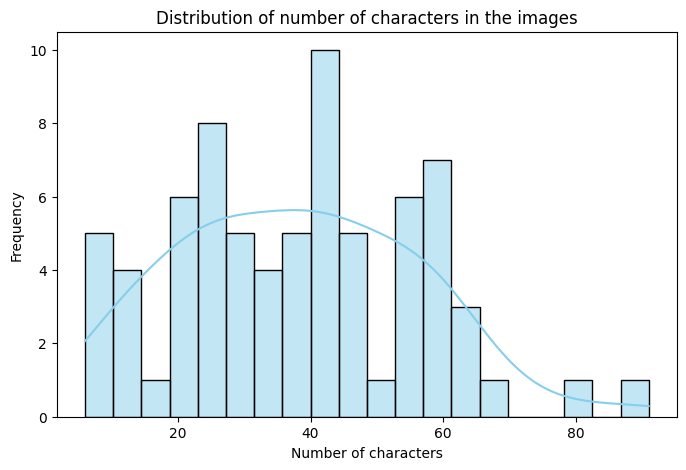

In [6]:
#plotting the distribution of number of characters in the images
plt.figure(figsize=(8, 5))
sns.histplot(num_chars,bins=20,kde=True,color='skyblue')
plt.xlabel('Number of characters')
plt.ylabel('Frequency')
plt.title('Distribution of number of characters in the images')
plt.show()

In [15]:
#getting all the unique characters and their frequency in the text data
chars_freq = {}
for text in text_data:
    for char in text:
        if char in chars_freq:
            chars_freq[char] += 1
        else:
            chars_freq[char] = 1
print("Total unique characters in the text data: ", len(chars_freq))
#print the chars in sorted order
print(sorted(chars_freq.keys()))

Total unique characters in the text data:  57
['\n', ' ', ',', '.', '0', '1', '5', '6', '9', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


### Observations ###
    - There are total 57 unique characarcters in the images.
    - The charactes includes alphabets (a-z , A-Z) , numbers (0-9) and punctuation chars (., )

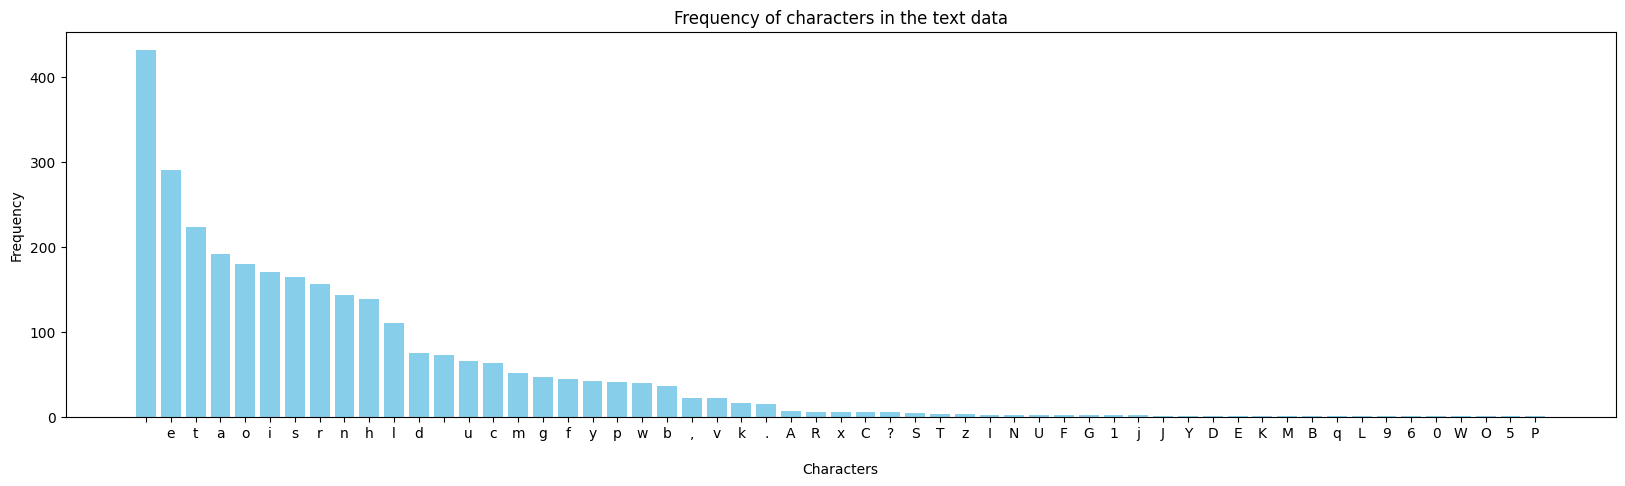

In [8]:
#plotting the frequency of characters in the text data
chars_freq = dict(sorted(chars_freq.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(20, 5))
plt.bar(chars_freq.keys(), chars_freq.values(),color='skyblue')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Frequency of characters in the text data')
plt.show()

### Observations ###
    - Space occured most number of times.
    - The frequency of vowels are much greater than the consonants.
    - Smallcase letters are present in much higher amount as compared to upper case letters.

### <span style="color:red"> The distribution shows that the text in the images is dervied from daily used words, this is an useful information which we can use to generate similar images.</span>

In [9]:
#weighted average of the number of characters in the images
#find the sum of all values
sum_values = sum(chars_freq.values())
#create a new dict with same keys and values/sum_values 
prob_chars_freq = {k: v/sum_values for k, v in chars_freq.items()}
#print the top 10 characters with their probabilities
print("Top 10 characters with their probabilities: ")
#convert them to percentage and round to two decimals
for i, (k, v) in enumerate(prob_chars_freq.items()):
    if i == 10:
        break
    print(k, " : ", round(v*100, 2), "%")

Top 10 characters with their probabilities: 
   :  14.82 %
e  :  9.99 %
t  :  7.65 %
a  :  6.55 %
o  :  6.18 %
i  :  5.83 %
s  :  5.63 %
r  :  5.35 %
n  :  4.91 %
h  :  4.74 %
